In [93]:
file=open('cleanedfile.csv','r')
filecontents = [i.strip().split('\n') for i in file]
file.close()
filecontents[0]

['text']

In [94]:
filecontents[0]

['text']

In [95]:
from textblob import TextBlob 

In [96]:
wpol = [[i,TextBlob(i[0]).sentiment.polarity] for i in filecontents]
wpol

[[['text'], 0.0],
 [['mavado in the am  x98xadx98xadx98xadx98xad its gonna be a great day mavado_gully gullygoddess caribbeangirl in novascotia'],
  0.8],
 [['what if all the raftaar - emiway beef was created to promote gully boyjustathoughtranveersinghraftaaremiwaygullyboy'],
  0.0],
 [['hopefully gully boy will stop yoyo honey singh and baadshah nonsense for good'],
  0.7],
 [['gully_point thats for more than 140 characters la'], 0.5],
 [['girliyapas gully bai is just too good x98x83'], 0.7],
 [['viviandivine gully gang'], 0.0],
 [['eagerly waiting for gully boynnranveer singh you are the rockstar ranveerofficial nngullyboy'],
  0.0],
 [['rujd_musicmstni but gully boy is also a multi composer album and btw drive music is on zee music'],
  0.0],
 [['god damn gully boy trailer is  so hard ranveerofficial  sbse uppar boss x98x8dx98x8d gonna break all record x9dxa4x9dxa4 gullyboytrailer x94xa5x94xa5'],
  -0.2916666666666667],
 [['pursuitofsolace okayy well watch gully boy xa4xa3'], 0.0],

In [97]:
neg = [i for i,j in wpol if j<0] 
#neu = [i for i,j in wpol if j==0] 
pos = [i for i,j in wpol if j>0] 

In [98]:
sentiments= [len(neg),len(pos)]

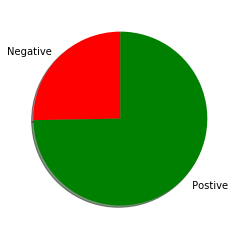

In [99]:
import matplotlib.pyplot as plt
labels = 'Negative',' Postive'
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels,colors=['r','g'],
        shadow=True, startangle=90)
plt.title=('Sentiment Analysis')
plt.show()

In [100]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer

In [101]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [102]:
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [103]:
word_tokens = [word_tokenize(i[0][0]) for i in wpol]

In [104]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]

In [105]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


In [106]:
filtered_sentence1=[]

for i in range(len(filtered_sentence)):
    for j in filtered_sentence[i]:
        filtered_sentence1.append(j)

In [108]:
without_single_chr = [word for word in filtered_sentence1 if len(word) > 2]

In [109]:
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()] 


In [120]:
cleaned_data_title1 = [cleaned_data_title[i] for i in range(len(cleaned_data_title)) if cleaned_data_title[i] not in ["gully","boy","official","ranveer","speakerpelosi","ranveerofficial","don_gully","mavado","mavado_gully","x98x82","senschumer"]
                       and 'http' not in stop_words 
 and not cleaned_data_title[i].startswith('@')
 and not cleaned_data_title[i].startswith('#')
 and cleaned_data_title[i] != 'RT' and cleaned_data_title[i] not in ["trailer"]
]

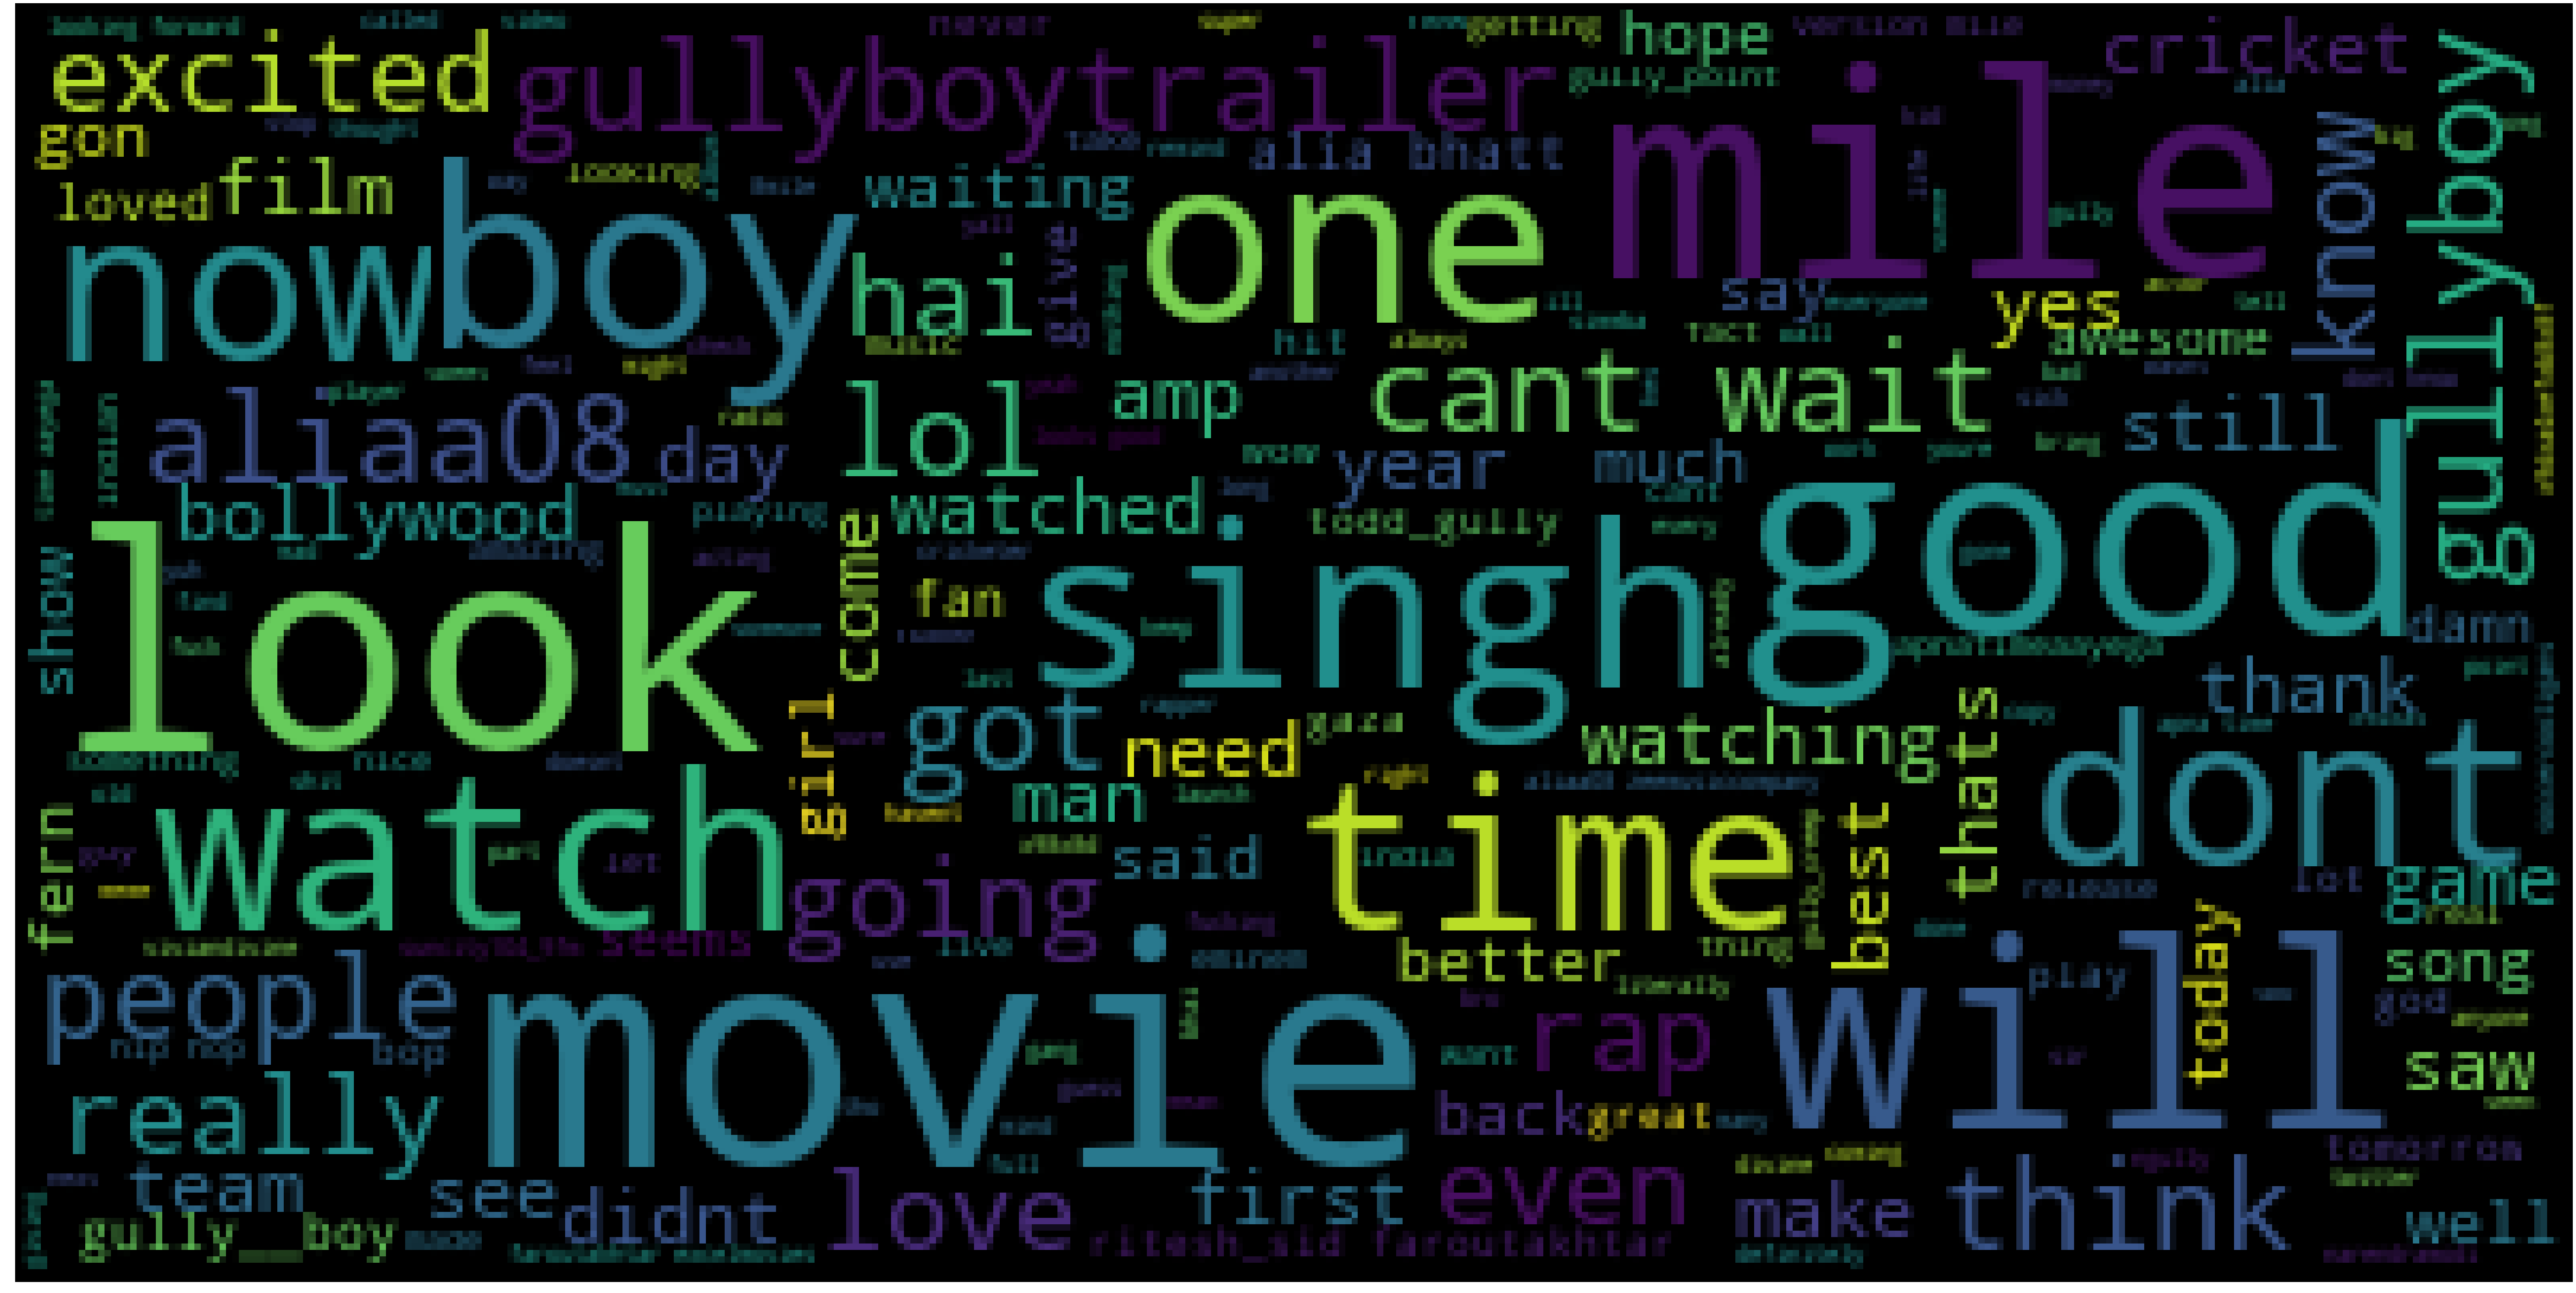

In [122]:
wc(cleaned_data_title1,'black','Common Words' )

In [127]:
baselist = [[TextBlob(i).sentiment.polarity,i] for i in cleaned_data_title1]

In [132]:
postive = [j for i,j in baselist if i>0]
negative = [j for i,j in baselist if i<0]

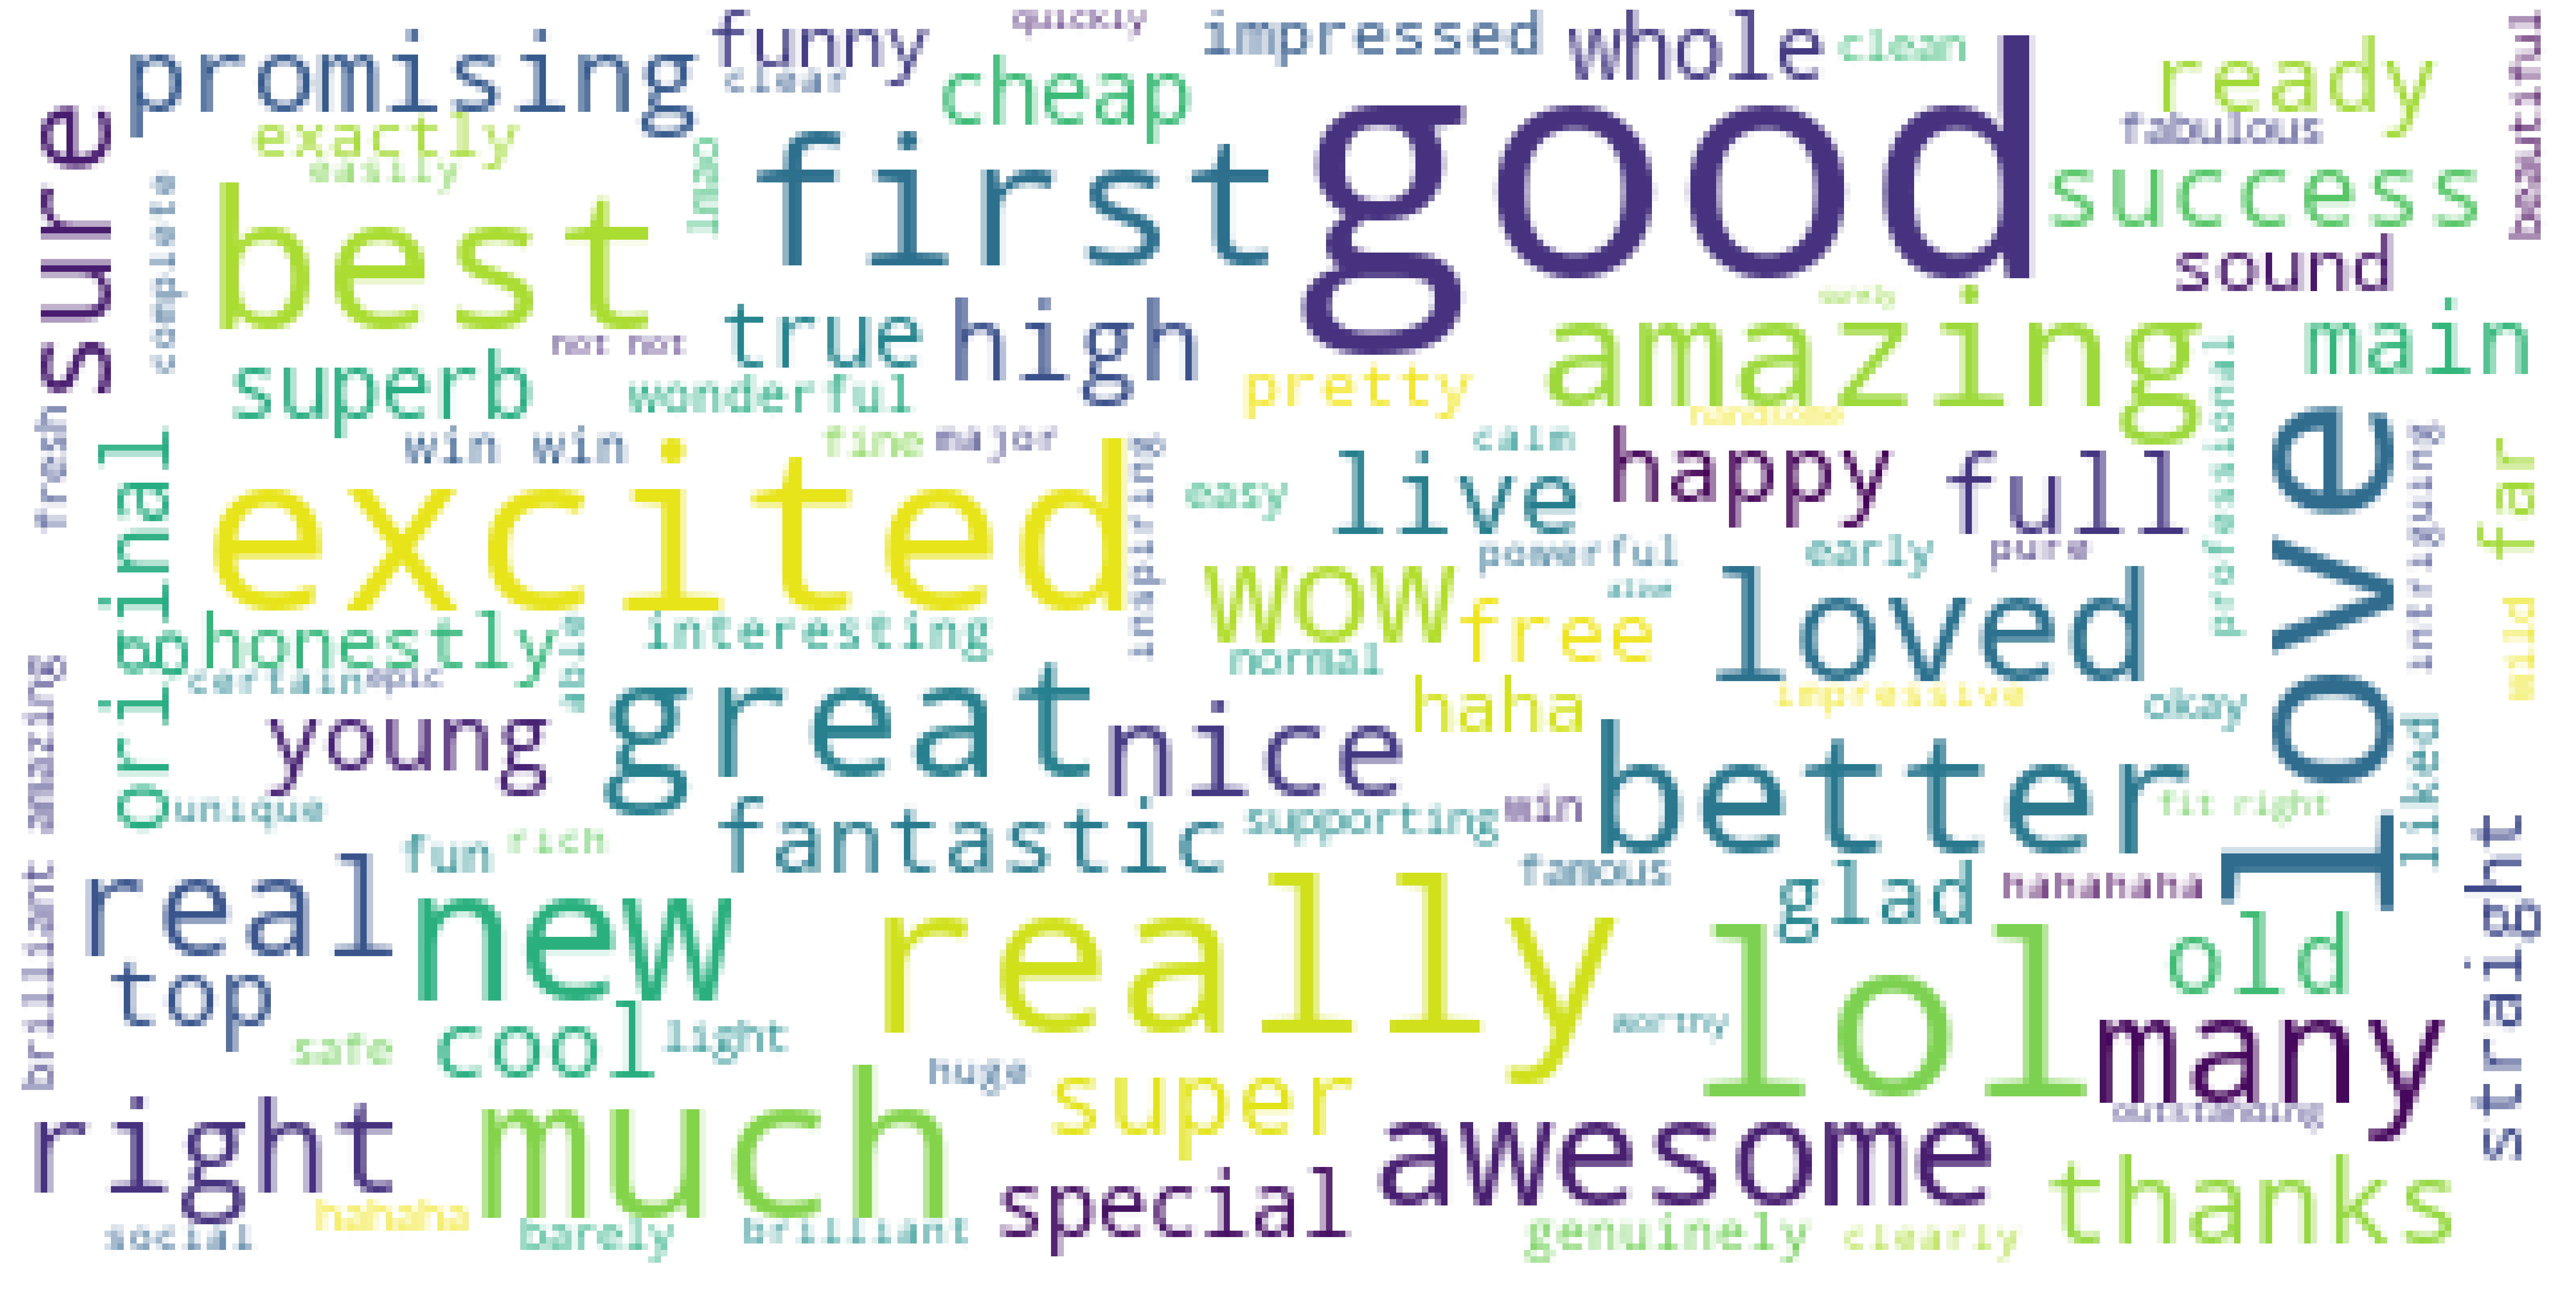

In [135]:
wc(postive,'white','Common Words' )

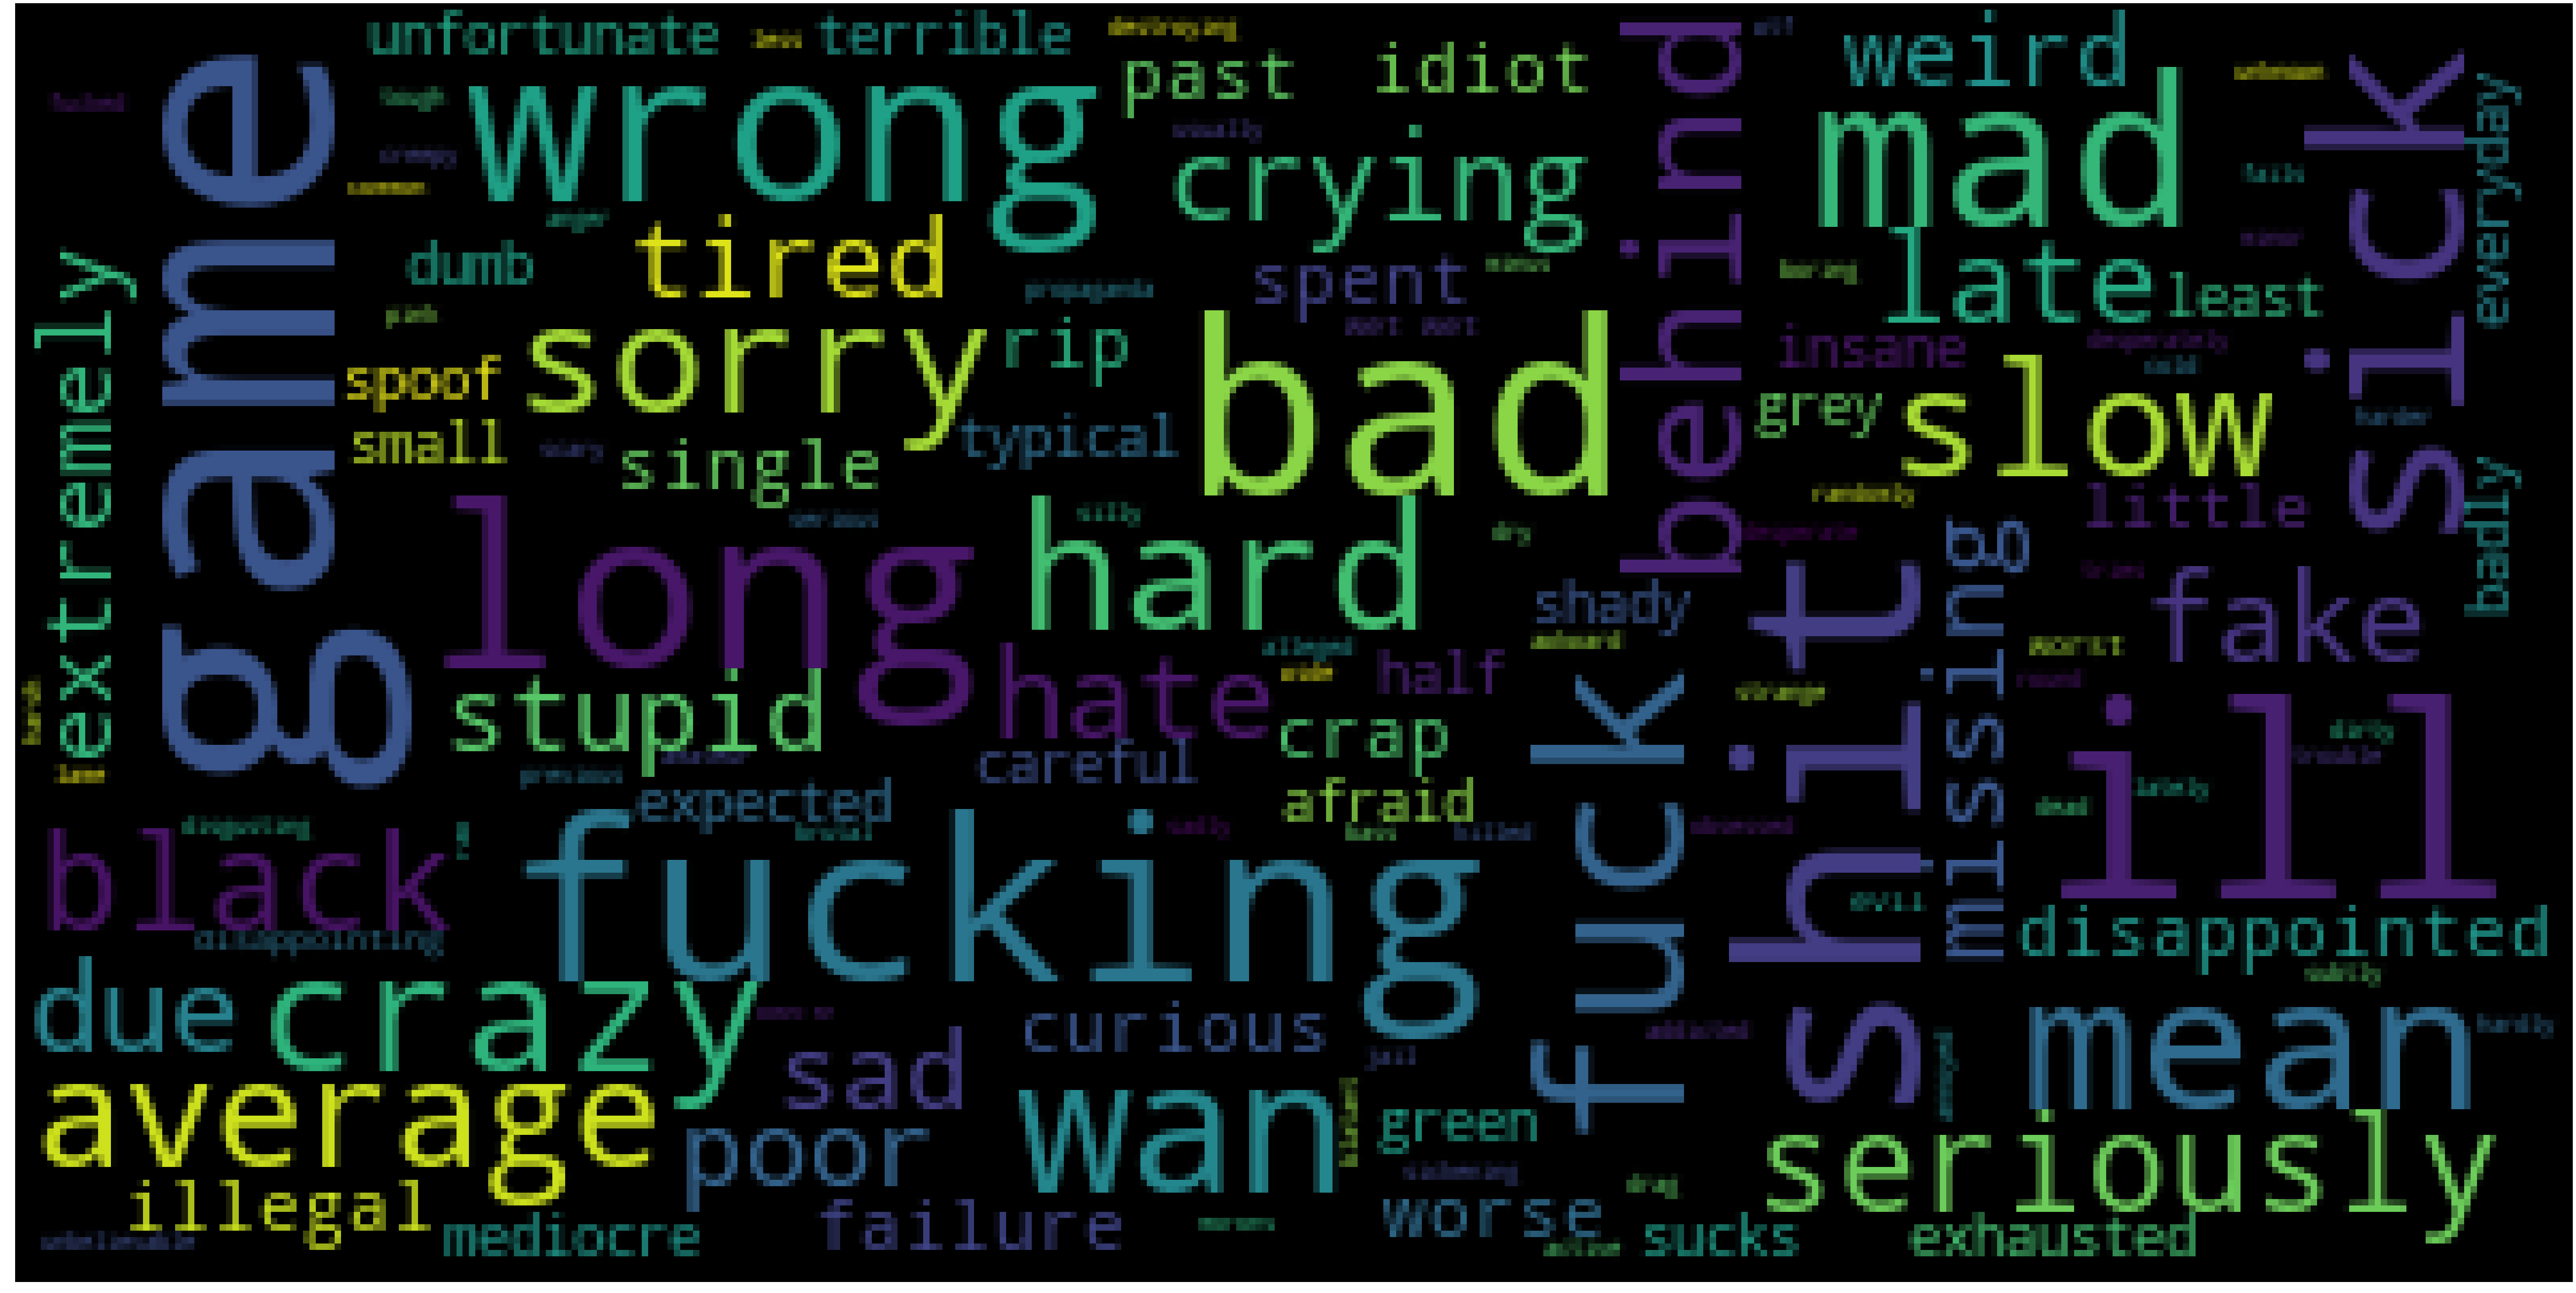

In [134]:
wc(negative,'black','Common Words' )